### Names 

This analysis contains the numbers of births equal my name (Cesar) and with the same sex along the years.

All data is public and available in this source: https://www.ssa.gov/OACT/babynames/background.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from google.cloud import bigquery
from google.oauth2 import service_account
credentials = service_account.Credentials.from_service_account_file('./Projeto_python_bq/python-api-gads-5adb7d92600d.json')

In [3]:
project_id = 'python-api-gads'
client = bigquery.Client(credentials = credentials, project = project_id)

In [4]:
query_job = client.query("""SELECT * FROM `python-api-gads.views_US.vw_names`""")
results = query_job.result()
print("Total Row Numbers: ", results.total_rows)

Total Row Numbers:  6311504


In [5]:
df = results.to_dataframe()

In [6]:
data = pd.DataFrame(df)

In [7]:
data.head()

,state,gender,year,name,number
0,AK,F,1910,Annie,12
1,AK,F,1910,Margaret,8
2,AK,F,1911,Ruth,7
3,AK,F,1911,Elizabeth,6
4,AK,F,1911,Helen,6


In [8]:
data.dtypes

state     object
gender    object
year       Int64
name      object
number     Int64
dtype: object

In [9]:
data["name"]

0              Annie
1           Margaret
2               Ruth
3          Elizabeth
4              Helen
             ...    
6311499    Remington
6311500      Vincent
6311501        Jonah
6311502       Marcus
6311503        Ronan
Name: name, Length: 6311504, dtype: object

In [10]:
name = data.loc[data['name'] == "Cesar"][data['gender'] == 'M'].sort_values(by=['year'])
print(name)

        state gender  year   name  number
5291689    TX      M  1916  Cesar       7
6164566    TX      M  1919  Cesar       5
6164903    TX      M  1920  Cesar       5
6165207    TX      M  1921  Cesar       5
6166465    TX      M  1925  Cesar       8
...       ...    ...   ...    ...     ...
5287013    TN      M  2021  Cesar      17
5102144    FL      M  2021  Cesar      34
3706685    GA      M  2021  Cesar      21
4093062    MA      M  2021  Cesar       7
5457481    IN      M  2021  Cesar       6

[1388 rows x 5 columns]


In [11]:
date = name["year"].astype(int)
value = name["number"].astype(int)

<AxesSubplot:xlabel='year', ylabel='number'>

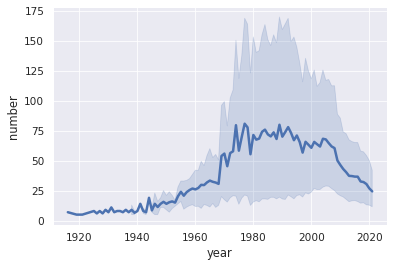

In [12]:
import seaborn as sns
sns.set_theme(style = "darkgrid")
sns.set_context("paper", font_scale=1.2, rc={"lines.linewidth": 2.5})
sns.lineplot(x = date, y = value)

We can see that after 60's the name Cesar it's grow 33% and after 93's, the year that I born, the name it's decreasing considerably pass the years, back to the same value on 60's.

What's the trend for my name next years ?

In [13]:
#fig, ax = plt.subplots(figsize = (12,8))
#ax.plot(date, value)